In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
md_df=pd.read_csv('Microsoft_Data.csv')
md_df

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56751,01a3aaeba82aa3de04506d45fe2f8293,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1056.0,0,7.0,0,NaN,53447.0,...,63568.0,1,NaN,0.0,0,0,0.0,1.0,3.0,0
56752,01a3aef1a1af51ef3e4aa0a1c99bf8b6,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,41571.0,...,33211.0,1,0.0,0.0,0,0,0.0,1.0,1.0,1
56753,01a3af52c05b6af7d971d5f3092c3a80,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1454.0,0,7.0,0,NaN,53447.0,...,44032.0,0,NaN,0.0,0,0,0.0,1.0,11.0,0
56754,01a3b0c12114367eb99eaa2fac6b754c,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,43856.0,...,60903.0,0,0.0,0.0,0,0,0.0,0.0,8.0,1


In [4]:
md_df.shape

(56756, 83)

# Drop the columns

In [5]:
# remove na>50

na_df=pd.DataFrame({'col_name':md_df.columns,'na_per':md_df.isnull().sum()/md_df.shape[0]*100})

na_grt50=list(na_df[na_df['na_per']>50]['col_name'])

na_grt50

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [6]:
# non-sense columns

non_sense=[col for col in md_df.columns if md_df[col].nunique==1 or md_df[col].nunique==md_df[col].shape[0]]

non_sense

[]

In [7]:
col_to_drop=na_grt50+non_sense
col_to_drop

['DefaultBrowsersIdentifier',
 'PuaMode',
 'Census_ProcessorClass',
 'Census_InternalBatteryType',
 'Census_IsFlightingInternal',
 'Census_ThresholdOptIn',
 'Census_IsWIMBootEnabled']

In [8]:
# drop columns now

md_df.drop(columns=col_to_drop,inplace=True)


# chi-square test

In [9]:

from scipy.stats import chi2_contingency

con_cols=[col for col in md_df.columns if md_df[col].dtype=='int64' or md_df[col].dtype=='float64']

cat_cols=[col for col in md_df.columns if md_df[col].dtype=='object']

sig_val=0.05
chi2_corr_cols=[]
chi2_nocorr_cols=[]

for col in cat_cols:
    contingency_table=pd.crosstab(md_df[col],md_df['HasDetections'])
    p_value=chi2_contingency(contingency_table)[1]
    if p_value<sig_val:
        chi2_corr_cols.append(col)
    else:
        chi2_nocorr_cols.append(col)
    
print(chi2_corr_cols)
print(chi2_nocorr_cols)

['EngineVersion', 'AppVersion', 'AvSigVersion', 'Platform', 'Processor', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel']
['MachineIdentifier', 'ProductName', 'OsVer', 'Census_FlightRing']


# Anova test

In [10]:
from scipy.stats import f_oneway

sig_val=0.05
anova_corr_cols=[]
anova_non_corr_cols=[]

con_cols=[col for col in md_df.columns if md_df[col].dtype=='int64' or md_df[col].dtype=='float64']

for col in con_cols:
    y_list=list(md_df[md_df['HasDetections']==1][col])
    n_list=list(md_df[md_df['HasDetections']==0][col])
    
    p_value=f_oneway(y_list,n_list)[1]
    
    if p_value<sig_val:
        anova_corr_cols.append(col)
    else:
        anova_non_corr_cols.append(col)
        

print(anova_corr_cols)
print(anova_non_corr_cols)

['IsSxsPassiveMode', 'CountryIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'Census_HasOpticalDiskDrive', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'HasDetections']
['IsBeta', 'RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', '

In [11]:
all_non_corr_cols=anova_non_corr_cols+chi2_nocorr_cols
y=md_df['HasDetections']
all_non_corr_cols.append('HasDetections')

md_df.drop(columns=all_non_corr_cols,inplace=True)


# Train-Test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(md_df,y,train_size=0.8,random_state=42)

In [14]:
# fill NA values
x_test.shape

(11352, 34)

In [15]:
con_cols=[col for col in md_df.columns if md_df[col].dtype=='int64' or md_df[col].dtype=='float64']

cat_cols=[col for col in md_df.columns if md_df[col].dtype=='object']

In [16]:
for col in con_cols:
    x_train[col].fillna(x_train[col].mean(),inplace=True)
    x_test[col].fillna(x_train[col].mean(),inplace=True)
    
for col in cat_cols:
    x_train[col].fillna(x_train[col].mode()[0],inplace=True)
    x_test[col].fillna(x_train[col].mode()[0],inplace=True)

# scaling

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
std_scalar=StandardScaler()


for col in con_cols:
    x_train[col]=std_scalar.fit_transform(np.array(x_train[col]).reshape(-1,1))
    x_test[col]=std_scalar.transform(np.array(x_test[col]).reshape(-1,1))
                                          

In [19]:
oe_train=pd.get_dummies(x_train[cat_cols])

oe_test=pd.get_dummies(x_test[cat_cols])

In [20]:
print(oe_train.shape)
print(oe_test.shape)

(45404, 3807)
(11352, 2389)


In [21]:
oe_train_final,oe_test_final=oe_train.align(oe_test,join='inner',axis=1)

In [22]:
print(oe_train_final.shape)
print(oe_test_final.shape)

(45404, 2084)
(11352, 2084)


In [23]:
x_train_final=pd.concat([x_train[con_cols],oe_train_final],axis=1)
x_test_final=pd.concat([x_test[con_cols],oe_test_final],axis=1)

# LOGISTIC REGRESSION

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg=LogisticRegression()

In [26]:
logreg.fit(x_train_final,y_train)

LogisticRegression()

# Lasso and Ridge

In [27]:
from sklearn.linear_model import SGDClassifier

lasso=SGDClassifier(penalty='l1', alpha=0.01, l1_ratio=0.15, verbose=1)
ridge=SGDClassifier(penalty='l2', alpha=0.01, l1_ratio=0.15, verbose=1)

lasso.fit(x_train_final,y_train)
ridge.fit(x_train_final,y_train)

lasso_coeffs=lasso.coef_
ridge_coeffs=ridge.coef_


len(lasso_coeffs[lasso_coeffs==0])
len(ridge_coeffs[ridge_coeffs==0])

lasso_test_pred=lasso.predict(x_test_final)
ridge_test_pred=ridge.predict(x_test_final)

from sklearn.metrics import accuracy_score

print('lasso_test_accuracy:',accuracy_score(y_test,lasso_test_pred))
print('ridge_test_accuracy:',accuracy_score(y_test,ridge_test_pred))

-- Epoch 1
Norm: 48.30, NNZs: 4, Bias: -0.166237, T: 45404, Avg. loss: 0.910532
Total training time: 1.07 seconds.
-- Epoch 2
Norm: 48.36, NNZs: 5, Bias: -0.118386, T: 90808, Avg. loss: 0.859479
Total training time: 2.14 seconds.
-- Epoch 3
Norm: 48.38, NNZs: 7, Bias: -0.093419, T: 136212, Avg. loss: 0.858556
Total training time: 3.23 seconds.
-- Epoch 4
Norm: 48.40, NNZs: 9, Bias: -0.075016, T: 181616, Avg. loss: 0.858193
Total training time: 4.48 seconds.
-- Epoch 5
Norm: 48.41, NNZs: 9, Bias: -0.057241, T: 227020, Avg. loss: 0.857960
Total training time: 5.54 seconds.
-- Epoch 6
Norm: 48.42, NNZs: 5, Bias: -0.045825, T: 272424, Avg. loss: 0.857899
Total training time: 6.68 seconds.
-- Epoch 7
Norm: 48.43, NNZs: 8, Bias: -0.040166, T: 317828, Avg. loss: 0.857808
Total training time: 7.75 seconds.
Convergence after 7 epochs took 7.75 seconds
-- Epoch 1
Norm: 1.67, NNZs: 2030, Bias: -0.431221, T: 45404, Avg. loss: 0.961449
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 1.59, NNZs:

In [28]:
test_pred=logreg.predict(x_test_final)
train_pred=logreg.predict(x_train_final)

In [29]:
probabs=logreg.predict_proba(x_test_final)

pos_probabs=probabs[::,1]

In [30]:
# auc-roc curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)

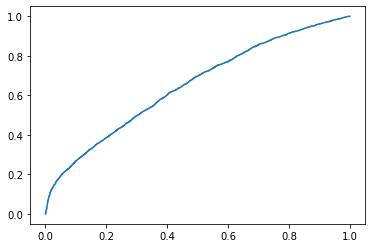

In [31]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,test_pred)

0.6002087792848778

In [33]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_pred)

array([[3594, 2149],
       [2386, 3223]], dtype=int64)

In [34]:
from sklearn.metrics import precision_score

precision_score(y_test,test_pred)

0.5999627699180938

In [35]:
from sklearn.metrics import recall_score

recall_score(y_test,test_pred)

0.5746122303440898

In [36]:
from sklearn.metrics import f1_score 

f1_score(y_test,test_pred)

0.5870139331572717

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,test_pred) # Test accuracy

0.6005109231853418

In [38]:
accuracy_score(y_train,train_pred) # Train accuracy

0.6325874372302

# DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=10)

In [41]:
d_tree.fit(x_train_final,y_train)

d_tree_test_pred=d_tree.predict(x_test_final)
d_tree_train_pred=d_tree.predict(x_train_final)

d_tree_probabs=d_tree.predict_proba(x_test_final)
pos_probabs=d_tree_probabs[::,1]

# auc-roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,pos_probabs)

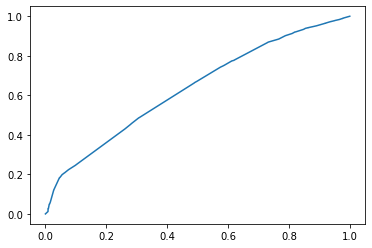

In [42]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,d_tree_test_pred)

0.5896873159778069

In [44]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,d_tree_test_pred)

array([[3981, 1762],
       [2882, 2727]], dtype=int64)

In [45]:
from sklearn.metrics import precision_score

precision_score(y_test,d_tree_test_pred)

0.6074849632434841

In [46]:
from sklearn.metrics import recall_score

recall_score(y_test,d_tree_test_pred)

0.48618292030665

In [47]:
from sklearn.metrics import f1_score 

f1_score(y_test,d_tree_test_pred)

0.5401069518716577

In [48]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_train,d_tree_train_pred)) # Train accuracy
print(accuracy_score(y_test,d_tree_test_pred)) # Test accuracy

0.6126332481719672
0.5909090909090909


In [49]:
# HYPER PARAMETER TUNING
# GRID SEARCH

from sklearn.model_selection import GridSearchCV

dt_c=DecisionTreeClassifier()

param_grid_dict={'max_depth':[4,5,6,7,9],'min_samples_split':[5,6,7,8],'min_samples_leaf':[4,5,6,7],'max_leaf_nodes':[3,4,5,6]}

gcv=GridSearchCV(dt_c,param_grid=param_grid_dict,cv=5,verbose=17)

gcv.fit(x_train_final,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5; 1/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 1/5; 1/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.6s
[CV 2/5; 1/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 1/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.5s
[CV 3/5; 1/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 1/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.7s
[CV 4/5; 1/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 1/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   3.8s
[CV 5/5; 1/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 1/320] END max_dep

[CV 1/5; 9/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.1s
[CV 2/5; 9/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 9/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.1s
[CV 3/5; 9/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 9/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.1s
[CV 4/5; 9/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 9/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 5/5; 9/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 9/320] END max_depth=4, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 1/5; 10/320] START max_depth=4, max_leaf_nodes=3, min_samples_leaf=6,

[CV 1/5; 17/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.7s
[CV 2/5; 17/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 17/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.6s
[CV 3/5; 17/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 17/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   3.6s
[CV 4/5; 17/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 17/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   4.5s
[CV 5/5; 17/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 17/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   4.9s
[CV 1/5; 18/320] START max_depth=4, max_leaf_nodes=4, min_sample

[CV 1/5; 25/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   4.8s
[CV 2/5; 25/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 25/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   3.9s
[CV 3/5; 25/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 25/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   6.3s
[CV 4/5; 25/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 25/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   5.9s
[CV 5/5; 25/320] START max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 25/320] END max_depth=4, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   5.1s
[CV 1/5; 26/320] START max_depth=4, max_leaf_nodes=4, min_sample

[CV 1/5; 33/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.2s
[CV 2/5; 33/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 33/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.3s
[CV 3/5; 33/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 33/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.0s
[CV 4/5; 33/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 33/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.6s
[CV 5/5; 33/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 33/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   6.6s
[CV 1/5; 34/320] START max_depth=4, max_leaf_nodes=5, min_sample

[CV 1/5; 41/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   5.1s
[CV 2/5; 41/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 41/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   5.3s
[CV 3/5; 41/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 41/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   5.2s
[CV 4/5; 41/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 41/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   5.2s
[CV 5/5; 41/320] START max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 41/320] END max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   5.6s
[CV 1/5; 42/320] START max_depth=4, max_leaf_nodes=5, min_sample

[CV 1/5; 49/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   5.5s
[CV 2/5; 49/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 49/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   5.6s
[CV 3/5; 49/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 49/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   4.8s
[CV 4/5; 49/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 49/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   5.8s
[CV 5/5; 49/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 49/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   5.1s
[CV 1/5; 50/320] START max_depth=4, max_leaf_nodes=6, min_sample

[CV 1/5; 57/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   4.9s
[CV 2/5; 57/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 57/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.6s
[CV 3/5; 57/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 57/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.6s
[CV 4/5; 57/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 57/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.4s
[CV 5/5; 57/320] START max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 57/320] END max_depth=4, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.7s
[CV 1/5; 58/320] START max_depth=4, max_leaf_nodes=6, min_sample

[CV 1/5; 65/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.8s
[CV 2/5; 65/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 65/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.1s
[CV 3/5; 65/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 65/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.8s
[CV 4/5; 65/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 65/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.7s
[CV 5/5; 65/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 65/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   4.5s
[CV 1/5; 66/320] START max_depth=5, max_leaf_nodes=3, min_sample

[CV 1/5; 73/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   4.7s
[CV 2/5; 73/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 73/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   4.9s
[CV 3/5; 73/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 73/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   4.1s
[CV 4/5; 73/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 73/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   4.8s
[CV 5/5; 73/320] START max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 73/320] END max_depth=5, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   4.8s
[CV 1/5; 74/320] START max_depth=5, max_leaf_nodes=3, min_sample

[CV 1/5; 81/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   5.3s
[CV 2/5; 81/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 81/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   5.0s
[CV 3/5; 81/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 81/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   5.0s
[CV 4/5; 81/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 81/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   4.9s
[CV 5/5; 81/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 81/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   5.3s
[CV 1/5; 82/320] START max_depth=5, max_leaf_nodes=4, min_sample

[CV 1/5; 89/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   4.7s
[CV 2/5; 89/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 89/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   5.2s
[CV 3/5; 89/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 89/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   5.0s
[CV 4/5; 89/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 89/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   4.7s
[CV 5/5; 89/320] START max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 89/320] END max_depth=5, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   4.9s
[CV 1/5; 90/320] START max_depth=5, max_leaf_nodes=4, min_sample

[CV 1/5; 97/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.8s
[CV 2/5; 97/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 97/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.2s
[CV 3/5; 97/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 97/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.4s
[CV 4/5; 97/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 97/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.6s
[CV 5/5; 97/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 97/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   5.2s
[CV 1/5; 98/320] START max_depth=5, max_leaf_nodes=5, min_sample

[CV 1/5; 105/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 105/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 105/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 3/5; 105/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 105/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 4/5; 105/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 105/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 5/5; 105/320] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 105/320] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 1/5; 106/320] START max_depth=5, max_leaf_nodes=5, 

[CV 1/5; 113/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 2/5; 113/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 113/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.6s
[CV 3/5; 113/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 113/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 4/5; 113/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 113/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 5/5; 113/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 113/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 1/5; 114/320] START max_depth=5, max_leaf_nodes=6, 

[CV 1/5; 121/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 121/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 121/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.6s
[CV 3/5; 121/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 121/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 4/5; 121/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 121/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   3.5s
[CV 5/5; 121/320] START max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 121/320] END max_depth=5, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.3s
[CV 1/5; 122/320] START max_depth=5, max_leaf_nodes=6, 

[CV 1/5; 129/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 2/5; 129/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 129/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 3/5; 129/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 129/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 4/5; 129/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 129/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 5/5; 129/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 129/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.1s
[CV 1/5; 130/320] START max_depth=6, max_leaf_nodes=3, 

[CV 1/5; 137/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 2/5; 137/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 137/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 3/5; 137/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 137/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 4/5; 137/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 137/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 5/5; 137/320] START max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 137/320] END max_depth=6, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 1/5; 138/320] START max_depth=6, max_leaf_nodes=3, 

[CV 1/5; 145/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 2/5; 145/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 145/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 3/5; 145/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 145/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 4/5; 145/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 145/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 5/5; 145/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 145/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 1/5; 146/320] START max_depth=6, max_leaf_nodes=4, 

[CV 1/5; 153/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 2/5; 153/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 153/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 3/5; 153/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 153/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 4/5; 153/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 153/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 5/5; 153/320] START max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 153/320] END max_depth=6, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 1/5; 154/320] START max_depth=6, max_leaf_nodes=4, 

[CV 1/5; 161/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 2/5; 161/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 161/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 3/5; 161/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 161/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 4/5; 161/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 161/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 5/5; 161/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 161/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 1/5; 162/320] START max_depth=6, max_leaf_nodes=5, 

[CV 1/5; 169/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 169/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 169/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 3/5; 169/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 169/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 4/5; 169/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 169/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 5/5; 169/320] START max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 169/320] END max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 1/5; 170/320] START max_depth=6, max_leaf_nodes=5, 

[CV 1/5; 177/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 2/5; 177/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 177/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.7s
[CV 3/5; 177/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 177/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 4/5; 177/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 177/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 5/5; 177/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 177/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.6s
[CV 1/5; 178/320] START max_depth=6, max_leaf_nodes=6, 

[CV 1/5; 185/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 185/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 185/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   3.8s
[CV 3/5; 185/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 185/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.5s
[CV 4/5; 185/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 185/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   4.8s
[CV 5/5; 185/320] START max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 185/320] END max_depth=6, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   5.4s
[CV 1/5; 186/320] START max_depth=6, max_leaf_nodes=6, 

[CV 1/5; 193/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 2/5; 193/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 193/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 3/5; 193/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 193/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 4/5; 193/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 193/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 5/5; 193/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 193/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 1/5; 194/320] START max_depth=7, max_leaf_nodes=3, 

[CV 1/5; 201/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 2/5; 201/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 201/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 3/5; 201/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 201/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 4/5; 201/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 201/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 5/5; 201/320] START max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 201/320] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 1/5; 202/320] START max_depth=7, max_leaf_nodes=3, 

[CV 1/5; 209/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 2/5; 209/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 209/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 3/5; 209/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 209/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 4/5; 209/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 209/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 5/5; 209/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 209/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 1/5; 210/320] START max_depth=7, max_leaf_nodes=4, 

[CV 1/5; 217/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 2/5; 217/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 217/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 3/5; 217/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 217/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 4/5; 217/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 217/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 5/5; 217/320] START max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 217/320] END max_depth=7, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 1/5; 218/320] START max_depth=7, max_leaf_nodes=4, 

[CV 1/5; 225/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 2/5; 225/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 225/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 3/5; 225/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 225/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 4/5; 225/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 225/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 5/5; 225/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 225/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 1/5; 226/320] START max_depth=7, max_leaf_nodes=5, 

[CV 1/5; 233/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 2/5; 233/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 233/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 3/5; 233/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 233/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 4/5; 233/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 233/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 5/5; 233/320] START max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 233/320] END max_depth=7, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 1/5; 234/320] START max_depth=7, max_leaf_nodes=5, 

[CV 1/5; 241/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 2/5; 241/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 241/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.7s
[CV 3/5; 241/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 241/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 4/5; 241/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 241/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 5/5; 241/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 241/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 1/5; 242/320] START max_depth=7, max_leaf_nodes=6, 

[CV 1/5; 249/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 2/5; 249/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 249/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 3/5; 249/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 249/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 4/5; 249/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 249/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 5/5; 249/320] START max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 249/320] END max_depth=7, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 1/5; 250/320] START max_depth=7, max_leaf_nodes=6, 

[CV 1/5; 257/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 2/5; 257/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 257/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 3/5; 257/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 257/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 4/5; 257/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 257/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 5/5; 257/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 257/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=4, min_samples_split=5; total time=   2.0s
[CV 1/5; 258/320] START max_depth=9, max_leaf_nodes=3, 

[CV 1/5; 265/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 2/5; 265/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 265/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 3/5; 265/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 265/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   1.9s
[CV 4/5; 265/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 265/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 5/5; 265/320] START max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 265/320] END max_depth=9, max_leaf_nodes=3, min_samples_leaf=6, min_samples_split=5; total time=   2.0s
[CV 1/5; 266/320] START max_depth=9, max_leaf_nodes=3, 

[CV 1/5; 273/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 2/5; 273/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 273/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 3/5; 273/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 273/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 4/5; 273/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 273/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 5/5; 273/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 273/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=4, min_samples_split=5; total time=   2.2s
[CV 1/5; 274/320] START max_depth=9, max_leaf_nodes=4, 

[CV 1/5; 281/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 2/5; 281/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 281/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 3/5; 281/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 281/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.2s
[CV 4/5; 281/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 281/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 5/5; 281/320] START max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 281/320] END max_depth=9, max_leaf_nodes=4, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 1/5; 282/320] START max_depth=9, max_leaf_nodes=4, 

[CV 1/5; 289/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 2/5; 289/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 289/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 3/5; 289/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 289/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.3s
[CV 4/5; 289/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 289/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 5/5; 289/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 289/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 1/5; 290/320] START max_depth=9, max_leaf_nodes=5, 

[CV 1/5; 297/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 297/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 297/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 3/5; 297/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 297/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 4/5; 297/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 297/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.3s
[CV 5/5; 297/320] START max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 297/320] END max_depth=9, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 1/5; 298/320] START max_depth=9, max_leaf_nodes=5, 

[CV 1/5; 305/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 2/5; 305/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 2/5; 305/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 3/5; 305/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 3/5; 305/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 4/5; 305/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 4/5; 305/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.4s
[CV 5/5; 305/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5
[CV 5/5; 305/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=4, min_samples_split=5; total time=   2.5s
[CV 1/5; 306/320] START max_depth=9, max_leaf_nodes=6, 

[CV 1/5; 313/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 2/5; 313/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 2/5; 313/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 3/5; 313/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 3/5; 313/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 4/5; 313/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 4/5; 313/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.5s
[CV 5/5; 313/320] START max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5
[CV 5/5; 313/320] END max_depth=9, max_leaf_nodes=6, min_samples_leaf=6, min_samples_split=5; total time=   2.4s
[CV 1/5; 314/320] START max_depth=9, max_leaf_nodes=6, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 9],
                         'max_leaf_nodes': [3, 4, 5, 6],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8]},
             verbose=17)

In [50]:
gcv.best_score_

0.5810722756086071

In [51]:
gcv.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [55]:
# RANDIMIZED SEARCH

from sklearn.model_selection import RandomizedSearchCV

dt_c=DecisionTreeClassifier()

param_rand_dict={'max_depth':[4,5,6,7,9],'min_samples_split':[3,4,5,6],'min_samples_leaf':[4,5,6],'max_leaf_nodes':[4,5,6,7]}

rcv=RandomizedSearchCV(dt_c,param_distributions=param_rand_dict,n_iter=8,cv=5,verbose=12)

rcv.fit(x_train_final,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 1/5; 1/8] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   2.4s
[CV 2/5; 1/8] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 2/5; 1/8] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   2.4s
[CV 3/5; 1/8] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 3/5; 1/8] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   2.3s
[CV 4/5; 1/8] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 4/5; 1/8] END max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6; total time=   2.3s
[CV 5/5; 1/8] START max_depth=5, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=6
[CV 5/5; 1/8] END max_depth=5, max_leaf_nodes=5, 

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=8,
                   param_distributions={'max_depth': [4, 5, 6, 7, 9],
                                        'max_leaf_nodes': [4, 5, 6, 7],
                                        'min_samples_leaf': [4, 5, 6],
                                        'min_samples_split': [3, 4, 5, 6]},
                   verbose=12)

In [53]:
rcv.best_score_

0.5810722756086071

In [54]:
rcv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_leaf_nodes': 6,
 'max_depth': 6}